<a href="https://colab.research.google.com/github/ananyarao23/EmoSense-TweetSentimentDetection/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WiDS-2023/twitter_data.csv',error_bad_lines=False)
df

<ipython-input-3-c1636fb63354>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/WiDS-2023/twitter_data.csv',error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
df1 = df.drop(['ItemID','SentimentSource'],axis=1)

In [ ]:
import string

the_punct = list(string.punctuation)
def remv_punc(text,punc_list):
  for punc in punc_list:
    if punc in text:
      text = text.replace(punc,' ')
  return text.strip()

def lower_replace(text):
  text = text.lower()
  text = text.replace(r'http\S+', '').replace(r'www\S+', '')
  return text.strip()

df1['SentimentText'] = df1['SentimentText'].apply(lambda x: remv_punc(x,the_punct))
df1['SentimentText'] = df1['SentimentText'].apply(lambda x: lower_replace(x))



In [ ]:
df1

,Sentiment,SentimentText
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 7 30 o
3,0,omgaga im sooo im gunna cry i ve been at th...
4,0,i think mi bf is cheating on me t t
...,...,...
1578607,1,zzzzzz finally night tweeters
1578608,1,zzzzzzz sleep well people
1578609,0,zzzzzzzzzz wait no i have homework
1578610,0,zzzzzzzzzzzzz meh what am i doing up again


In [ ]:
#stopwords
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remv_stopwords(text,stop_words):
  return " ".join([word for word in str(text).split() if word not in stop_words])

df1['SentimentText_stopword'] = df1['SentimentText'].apply(lambda x: remv_stopwords(x,stop_words))



In [ ]:
df1

,Sentiment,SentimentText,SentimentText_stopword
0,0,is so sad for my apl friend,sad apl friend
1,0,i missed the new moon trailer,missed new moon trailer
2,1,omg its already 7 30 o,omg already 7 30
3,0,omgaga im sooo im gunna cry i ve been at th...,omgaga im sooo im gunna cry dentist since 11 s...
4,0,i think mi bf is cheating on me t t,think mi bf cheating
...,...,...,...
1578607,1,zzzzzz finally night tweeters,zzzzzz finally night tweeters
1578608,1,zzzzzzz sleep well people,zzzzzzz sleep well people
1578609,0,zzzzzzzzzz wait no i have homework,zzzzzzzzzz wait homework
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,zzzzzzzzzzzzz meh


In [ ]:
#tokenization

def text_tokenize(text):
  token_list = []
  for word in text.split(" "):
    token_list.append(word)
  return token_list

df1['TokenizedText'] = df1['SentimentText_stopword'].apply(lambda x: text_tokenize(x))


In [ ]:
df1

,Sentiment,SentimentText,TokenizedText,SentimentText_stopword
0,0,is so sad for my apl friend,"[sad, apl, friend]",sad apl friend
1,0,i missed the new moon trailer,"[missed, new, moon, trailer]",missed new moon trailer
2,1,omg its already 7 30 o,"[omg, already, 7, 30]",omg already 7 30
3,0,omgaga im sooo im gunna cry i ve been at th...,"[omgaga, im, sooo, im, gunna, cry, dentist, si...",omgaga im sooo im gunna cry dentist since 11 s...
4,0,i think mi bf is cheating on me t t,"[think, mi, bf, cheating]",think mi bf cheating
...,...,...,...,...
1578607,1,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]",zzzzzz finally night tweeters
1578608,1,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]",zzzzzzz sleep well people
1578609,0,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, homework]",zzzzzzzzzz wait homework
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh]",zzzzzzzzzzzzz meh


In [ ]:
#stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
  new_text = [stemmer.stem(word) for word in text]
  return " ".join(new_text)

df1['StemmedText'] = df1['TokenizedText'].apply(lambda x: stem_text(x))


In [ ]:
df1

,Sentiment,SentimentText,SentimentText_stopword,TokenizedText,StemmedText
0,0,is so sad for my apl friend,sad apl friend,"[sad, apl, friend]",sad apl friend
1,0,i missed the new moon trailer,missed new moon trailer,"[missed, new, moon, trailer]",miss new moon trailer
2,1,omg its already 7 30 o,omg already 7 30,"[omg, already, 7, 30]",omg alreadi 7 30
3,0,omgaga im sooo im gunna cry i ve been at th...,omgaga im sooo im gunna cry dentist since 11 s...,"[omgaga, im, sooo, im, gunna, cry, dentist, si...",omgaga im sooo im gunna cri dentist sinc 11 su...
4,0,i think mi bf is cheating on me t t,think mi bf cheating,"[think, mi, bf, cheating]",think mi bf cheat
...,...,...,...,...,...
1578607,1,zzzzzz finally night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]",zzzzzz final night tweeter
1578608,1,zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]",zzzzzzz sleep well peopl
1578609,0,zzzzzzzzzz wait no i have homework,zzzzzzzzzz wait homework,"[zzzzzzzzzz, wait, homework]",zzzzzzzzzz wait homework
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,zzzzzzzzzzzzz meh,"[zzzzzzzzzzzzz, meh]",zzzzzzzzzzzzz meh


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization(text):
  new_text = [lemmatizer.lemmatize(word) for word in text.split(" ")]
  return " ".join(new_text)

df1['LemmatizedText'] = df1['SentimentText_stopword'].apply(lambda x: lemmatization(x))

In [ ]:
df1.isna().sum()

Sentiment                 0
SentimentText             0
SentimentText_stopword    0
TokenizedText             0
StemmedText               0
LemmatizedText            0
dtype: int64

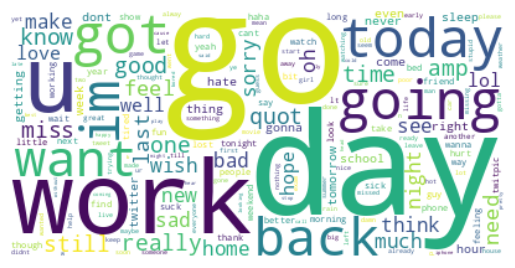

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text0 = ""

text1 = ""

for i in range(len(df1['SentimentText_stopword'])):
  if df1['Sentiment'][i] == 1:
    text1 += df1['SentimentText_stopword'][i]
  else:
    text0 += df1['SentimentText_stopword'][i]


word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)
word_cloud0 = WordCloud(collocations = False, background_color = 'white').generate(text0)

# Display the generated Word Cloud

plt.imshow(word_cloud0, interpolation='bilinear')

plt.axis("off")

plt.show()


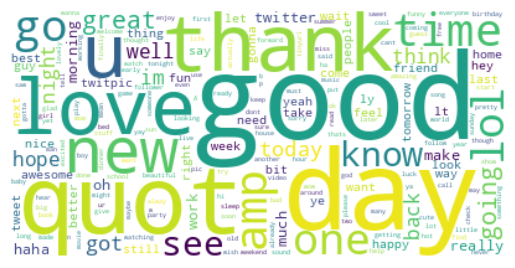

In [ ]:
plt.imshow(word_cloud1, interpolation='bilinear')

plt.axis("off")

plt.show()


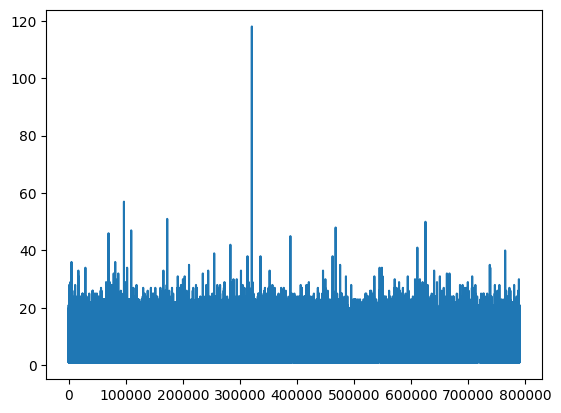

In [ ]:
word_len_0 = []
word_len_1 = []

for i in range(len(df1['Sentiment'])):
  if df1['Sentiment'][i] == 1:
    word_len_1.append(len(df1['SentimentText_stopword'][i].split(" ")))
  else:
    word_len_0.append(len(df1['SentimentText_stopword'][i].split(" ")))

word_len_1 = np.array(word_len_1)
word_len_0 = np.array(word_len_0)

plt.plot(word_len_1)
plt.show()

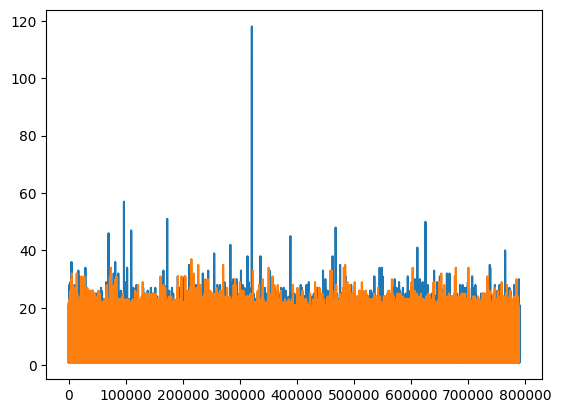

In [ ]:
plt.plot(word_len_1)
plt.plot(word_len_0)
plt.show()


In [ ]:
from textblob import TextBlob

In [ ]:
#sentiment analysis

def sentiment_analysis(data_frame):
  def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

  def getPolarity(text):
    return TextBlob(text).sentiment.polarity

  data_frame['Text_Subjectivity'] = data_frame['SentimentText'].apply(lambda x: getSubjectivity(x))
  data_frame['Text_Polarity'] = data_frame['SentimentText'].apply(lambda x: getPolarity(x))

  def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

  data_frame['Text_Analysis'] = data_frame['Text_Polarity'].apply(lambda x: getAnalysis(x))

  return data_frame



In [ ]:
df1 = sentiment_analysis(df1)

In [ ]:
df1

,Sentiment,SentimentText,SentimentText_stopword,TokenizedText,StemmedText,LemmatizedText,Text_Subjectivity,Text_Polarity,Text_Analysis
0,0,is so sad for my apl friend,sad apl friend,"[sad, apl, friend]",sad apl friend,sad apl friend,1.000000,-0.500000,Negative
1,0,i missed the new moon trailer,missed new moon trailer,"[missed, new, moon, trailer]",miss new moon trailer,missed new moon trailer,0.454545,0.136364,Positive
2,1,omg its already 7 30 o,omg already 7 30,"[omg, already, 7, 30]",omg alreadi 7 30,omg already 7 30,0.000000,0.000000,Neutral
3,0,omgaga im sooo im gunna cry i ve been at th...,omgaga im sooo im gunna cry dentist since 11 s...,"[omgaga, im, sooo, im, gunna, cry, dentist, si...",omgaga im sooo im gunna cri dentist sinc 11 su...,omgaga im sooo im gunna cry dentist since 11 s...,0.000000,0.000000,Neutral
4,0,i think mi bf is cheating on me t t,think mi bf cheating,"[think, mi, bf, cheating]",think mi bf cheat,think mi bf cheating,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
1578607,1,zzzzzz finally night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]",zzzzzz final night tweeter,zzzzzz finally night tweeter,1.000000,0.000000,Neutral
1578608,1,zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]",zzzzzzz sleep well peopl,zzzzzzz sleep well people,0.000000,0.000000,Neutral
1578609,0,zzzzzzzzzz wait no i have homework,zzzzzzzzzz wait homework,"[zzzzzzzzzz, wait, homework]",zzzzzzzzzz wait homework,zzzzzzzzzz wait homework,0.000000,0.000000,Neutral
1578610,0,zzzzzzzzzzzzz meh what am i doing up again,zzzzzzzzzzzzz meh,"[zzzzzzzzzzzzz, meh]",zzzzzzzzzzzzz meh,zzzzzzzzzzzzz meh,0.000000,0.000000,Neutral
